In [2]:
print("does this work?")    

does this work?


In [5]:
!unzip dataset.zip -d dataset

Archive:  dataset.zip
  inflating: dataset/annotations/Cars0.xml  
  inflating: dataset/annotations/Cars1.xml  
  inflating: dataset/annotations/Cars10.xml  
  inflating: dataset/annotations/Cars100.xml  
  inflating: dataset/annotations/Cars101.xml  
  inflating: dataset/annotations/Cars102.xml  
  inflating: dataset/annotations/Cars103.xml  
  inflating: dataset/annotations/Cars104.xml  
  inflating: dataset/annotations/Cars105.xml  
  inflating: dataset/annotations/Cars106.xml  
  inflating: dataset/annotations/Cars107.xml  
  inflating: dataset/annotations/Cars108.xml  
  inflating: dataset/annotations/Cars109.xml  
  inflating: dataset/annotations/Cars11.xml  
  inflating: dataset/annotations/Cars110.xml  
  inflating: dataset/annotations/Cars111.xml  
  inflating: dataset/annotations/Cars112.xml  
  inflating: dataset/annotations/Cars113.xml  
  inflating: dataset/annotations/Cars114.xml  
  inflating: dataset/annotations/Cars115.xml  
  inflating: dataset/annotations/Cars116.xml

In [16]:
!pip3 install pylabel

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 1.6 MB/s eta 0:00:000:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 2.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.4 MB/s eta 0:00:001.6 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [17]:
from pylabel import importer
PATH_TO_ANNOTATIONS = './dataset/annotations'
dataset = importer.ImportVOC(path=PATH_TO_ANNOTATIONS)
dataset.export.ExportToYoloV5()

Exporting YOLO files...: 100%|██████████| 433/433 [00:00<00:00, 1328.09it/s]


['training/dataset.yaml',
 'training/labels/Cars388.txt',
 'training/labels/Cars386.txt',
 'training/labels/Cars299.txt',
 'training/labels/Cars224.txt',
 'training/labels/Cars322.txt',
 'training/labels/Cars101.txt',
 'training/labels/Cars268.txt',
 'training/labels/Cars87.txt',
 'training/labels/Cars213.txt',
 'training/labels/Cars12.txt',
 'training/labels/Cars281.txt',
 'training/labels/Cars112.txt',
 'training/labels/Cars387.txt',
 'training/labels/Cars320.txt',
 'training/labels/Cars120.txt',
 'training/labels/Cars144.txt',
 'training/labels/Cars368.txt',
 'training/labels/Cars304.txt',
 'training/labels/Cars165.txt',
 'training/labels/Cars195.txt',
 'training/labels/Cars378.txt',
 'training/labels/Cars100.txt',
 'training/labels/Cars424.txt',
 'training/labels/Cars426.txt',
 'training/labels/Cars264.txt',
 'training/labels/Cars188.txt',
 'training/labels/Cars27.txt',
 'training/labels/Cars360.txt',
 'training/labels/Cars307.txt',
 'training/labels/Cars260.txt',
 'training/labels

In [18]:
!cp -r './dataset/images' './training/'

In [1]:
import cv2
import os


def draw_bounding_box(image, label_path, class_names, normalized=True):
    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()

    for line in lines:
        class_id, x_center, y_center, box_width, box_height = map(
            float, line.split())
        class_id = int(class_id)

        if not normalized:
            # If coordinates are not normalized, convert them to normalized
            width, height = image.shape[1], image.shape[0]
            x_center /= width
            y_center /= height
            box_width /= width
            box_height /= height

        # Convert YOLO format to (xmin, ymin, xmax, ymax)
        width, height = image.shape[1], image.shape[0]
        xmin = int((x_center - box_width / 2) * width)
        ymin = int((y_center - box_height / 2) * height)
        xmax = int((x_center + box_width / 2) * width)
        ymax = int((y_center + box_height / 2) * height)

        # Draw bounding box
        color = (0, 255, 0)  # Green color
        thickness = 2
        image = cv2.rectangle(image, (xmin, ymin),
                              (xmax, ymax), color, thickness)

        # Draw class name
        class_name = class_names[class_id]
        text = f"{class_name}"
        org = (xmin, ymin - 5)  # Slightly above the bounding box
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        cv2.putText(image, text, org, font, font_scale,
                    color, thickness, cv2.LINE_AA)

    return image


def save_images_with_annotations(image_folder, label_folder, output_folder, class_names, normalized=True):
    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, filename)
            label_path = os.path.join(
                label_folder, os.path.splitext(filename)[0] + ".txt")

            if os.path.exists(label_path):
                image = cv2.imread(image_path)
                image_with_boxes = draw_bounding_box(
                    image, label_path, class_names, normalized)

                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, image_with_boxes)


image_folder = "training/images"
label_folder = "training/labels"
output_folder = "Output/Sample_Images"
class_names = ["licence"]  # Update with your class names

save_images_with_annotations(
    image_folder, label_folder, output_folder, class_names)

In [2]:
import os
import shutil
import random

# Define the directory paths
root_dir = "./processed_dataset/"
images_dir = os.path.join(root_dir, "images")
labels_dir = os.path.join(root_dir, "labels")

# Create directories for training and validation sets
train_dir = os.path.join(root_dir, "train")
val_dir = os.path.join(root_dir, "val")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Create subdirectories for images and labels within train and val
train_images_dir = os.path.join(train_dir, "images")
train_labels_dir = os.path.join(train_dir, "labels")
val_images_dir = os.path.join(val_dir, "images")
val_labels_dir = os.path.join(val_dir, "labels")
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Get the list of files in the directories
image_files = os.listdir(images_dir)
label_files = os.listdir(labels_dir)

# Shuffle the lists to ensure random distribution
random.shuffle(image_files)
random.shuffle(label_files)

# Calculate the split index
split_index = int(len(image_files) * 0.7)

# Split the files into training and validation sets
train_image_files = image_files[:split_index]
val_image_files = image_files[split_index:]

train_label_files = label_files[:split_index]
val_label_files = label_files[split_index:]

# Copy the files to the corresponding directories
for file in train_image_files:
    shutil.copy(os.path.join(images_dir, file), train_images_dir)

for file in val_image_files:
    shutil.copy(os.path.join(images_dir, file), val_images_dir)

for file in train_label_files:
    shutil.copy(os.path.join(labels_dir, file), train_labels_dir)

for file in val_label_files:
    shutil.copy(os.path.join(labels_dir, file), val_labels_dir)


In [12]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16408, done.
remote: Total 16408 (delta 0), reused 0 (delta 0), pack-reused 16408
Receiving objects: 100% (16408/16408), 14.89 MiB | 985.00 KiB/s, done.
Resolving deltas: 100% (11265/11265), done.


In [4]:
import torch
torch.cuda.empty_cache()
%cd yolov5/
!python3 train.py --data ../trainconfig.yaml --weights yolov5n.pt --img 640 --batch 1 --epochs 20 --project=../NumberPlateDataset_1_yolo --name=run_1 --exist-ok

[Errno 2] No such file or directory: 'yolov5/'
/home/the_architect/Projects/AI_Projects/3/yolov5
2024-02-02 10:36:10.111816: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 10:36:10.111893: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 10:36:10.111928: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5n.pt, cfg=, data=../trainconfig.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resu

In [2]:
%cd 3
!python3 yolov5/val.py --weights NumberPlateDataset_1_yolo/run_1/weights/best.pt --data trainconfig.yaml --img 640 --half --conf-thres 0.5 --project  Output/Detected

/home/the_architect/Projects/AI_Projects/3
val: data=trainconfig.yaml, weights=['NumberPlateDataset_1_yolo/run_1/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.5, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=Output/Detected, name=exp, exist_ok=False, half=True, dnn=False
WARNING ⚠️ confidence threshold 0.5 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-283-g875d9278 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3902MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
val: Scanning /home/the_architect/Projects/AI_Projects/3/processed_dataset/val/l
                 Class     Images  Instances          P          R      mAP50   
                   all        130         40      0.269       0.35      0.227      0.167
Speed: 0.9ms pre-process, 8.3ms inference, 3.1ms NMS pe

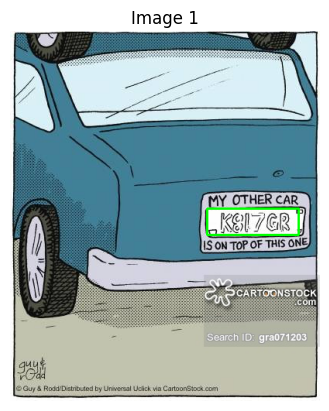

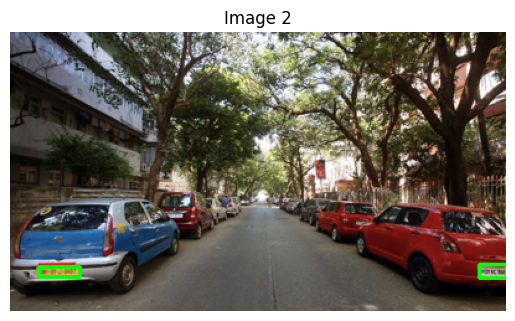

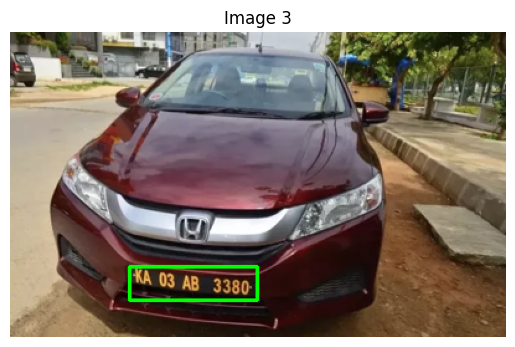

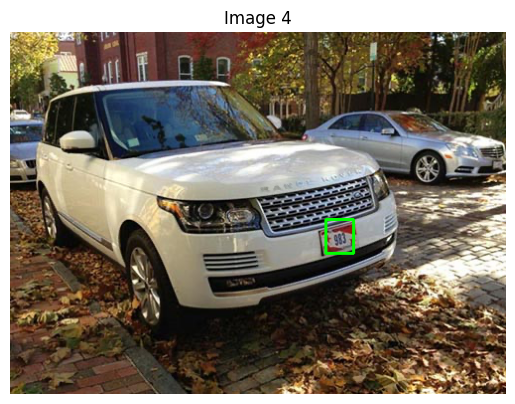

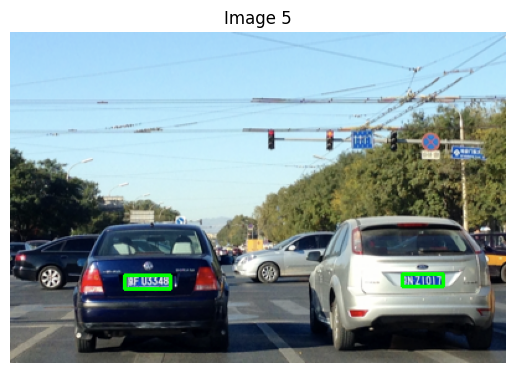

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

def display_images_with_bbox(n):
    # Define the directory paths
    root_dir = "./processed_dataset/"
    images_dir = os.path.join(root_dir, "images")
    labels_dir = os.path.join(root_dir, "labels")

    # Get the list of files in the directories
    image_files = os.listdir(images_dir)
    label_files = os.listdir(labels_dir)

    # Loop through each image file
    for i, image_file in enumerate(image_files):
        if i >= n:
            break

        # Load the image
        img = cv2.imread(os.path.join(images_dir, image_file))

        # Get the corresponding label file
        label_file = image_file.replace('.png', '.txt')
        if label_file in label_files:
            # Read the coordinates from the label file
            with open(os.path.join(labels_dir, label_file), 'r') as f:
                lines = f.readlines()

            # Draw a rectangle on the image for each set of coordinates
            for line in lines:
                coords = line.strip().split(' ')
                class_id, x_center, y_center, width, height = map(float, coords)
                x = int((x_center - width / 2) * img.shape[1])
                y = int((y_center - height / 2) * img.shape[0])
                w = int(width * img.shape[1])
                h = int(height * img.shape[0])
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Convert the image from BGR to RGB color space
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image with bounding boxes
        plt.figure()
        plt.imshow(img_rgb)
        plt.title(f"Image {i+1}")
        plt.axis("off")
        plt.show()

# Call the function with the desired number of images to display
display_images_with_bbox(5)
